# Load Library

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler

from scipy import stats
import random

np.random.seed(42)


# Data Cleaning

**IMPORT DATASET**

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

**Detecting NULL value**

In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Fill NA  
Predict Feature "Income" By Mean of Income group by Education**

In [4]:
df['Income'].fillna(df.groupby('Education')['Income'].transform('mean'), inplace=True)


**Detecting Duplicate**

In [5]:
df[df.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

In [6]:
# Convert 'Year_Birth' to 'Age' for better understanding 
df['Year_Birth'] = 2021 - df['Year_Birth']
df.rename(columns={'Year_Birth': 'Age'}, inplace=True)

# "Education" variable.
#df['Education'] = df['Education'].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# Merg 'Kidhome' and 'Teenhome' into 'Children'
df['Children'] = df['Kidhome'] + df['Teenhome']
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

# Referring to the parenthood status
df['Parental_Status'] = (df['Children'] != 0).astype(int)
df.drop(['Children'], axis=1, inplace=True)

# Count Customer's total spent
df['Total_Spend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Count total Cmp accepted by Customer
df["Total_Offer"] =  df["AcceptedCmp1"] + df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

# Count total purchases by all methods
df['Num_Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Exploratory Data Analysis

 **Descriptive Statistics:**

- Calculate basic statistics for numerical variables: mean, median, standard deviation, minimum, and maximum.
- Plot the distribution for the important features.
- nalyze the correlation between features.

In [7]:
df.describe().style.background_gradient(cmap='Blues')

**Distribution of All Numerical Features**

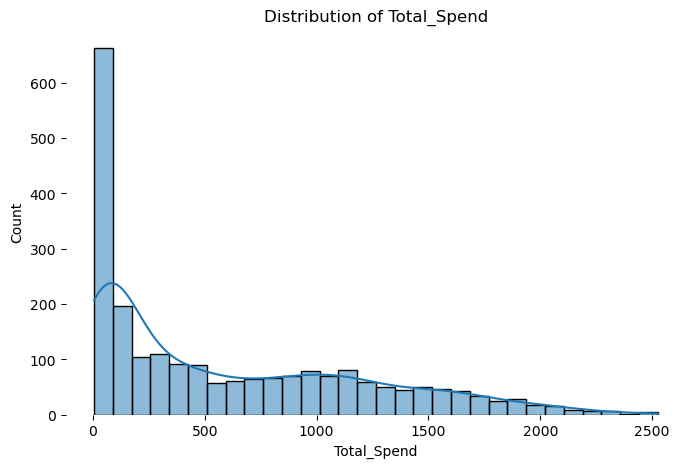

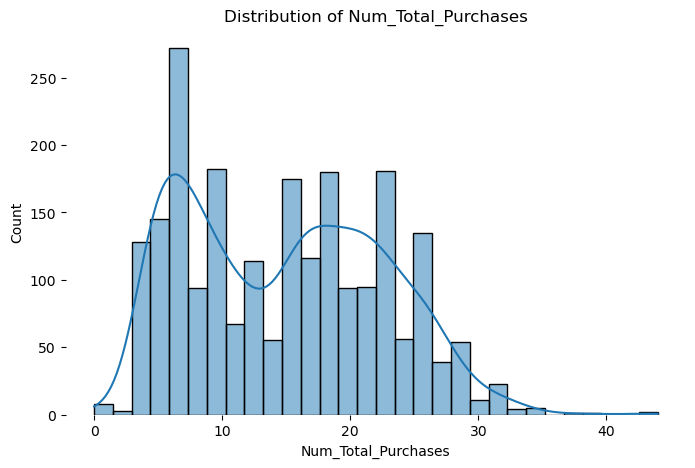

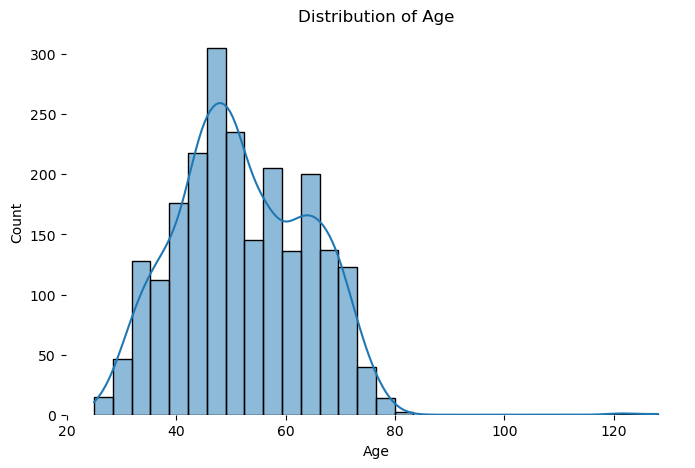

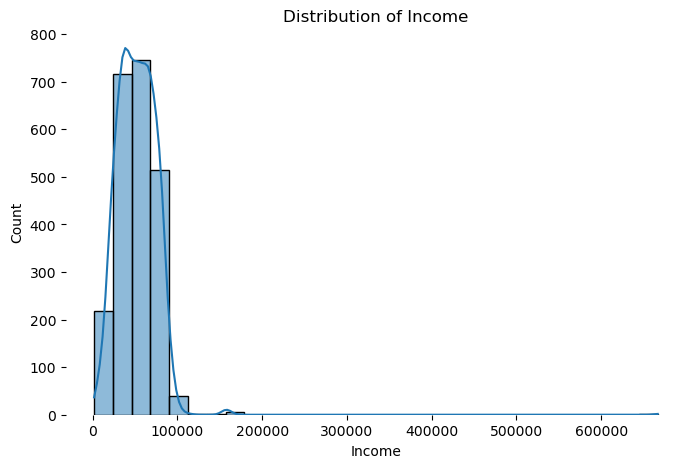

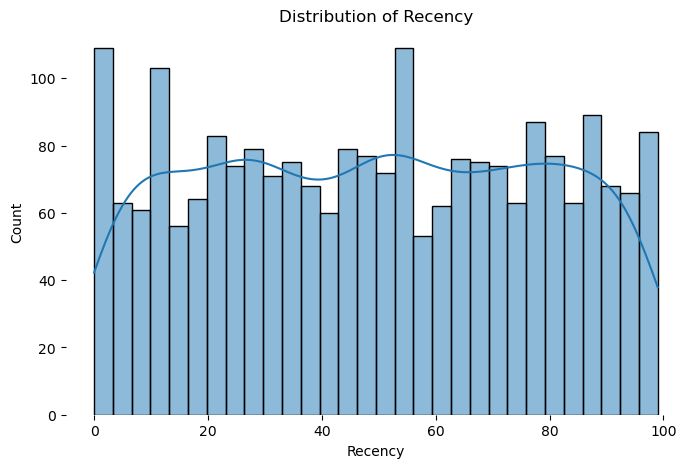

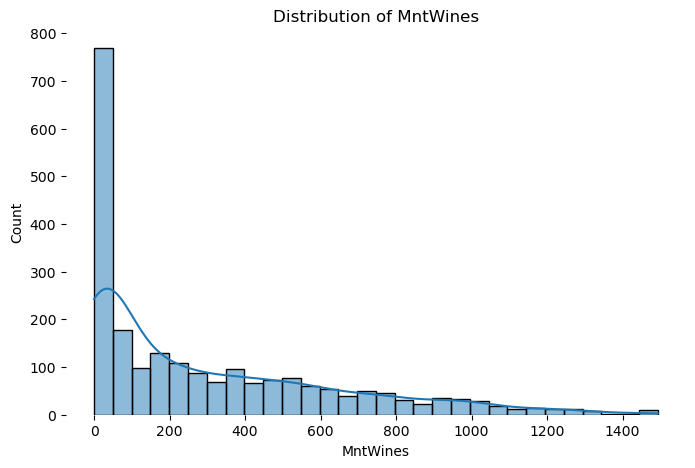

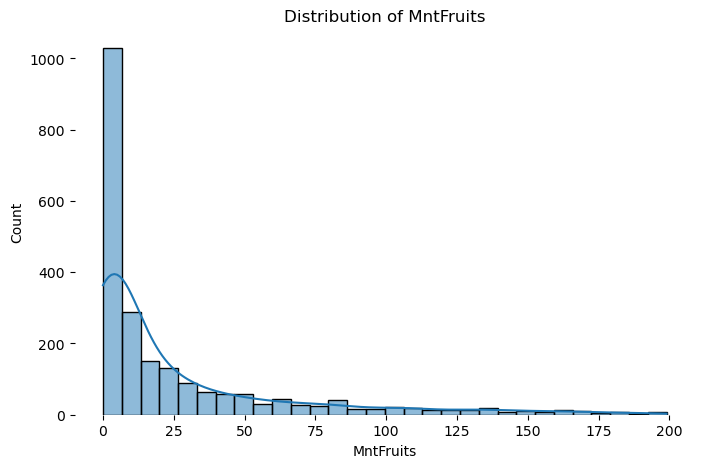

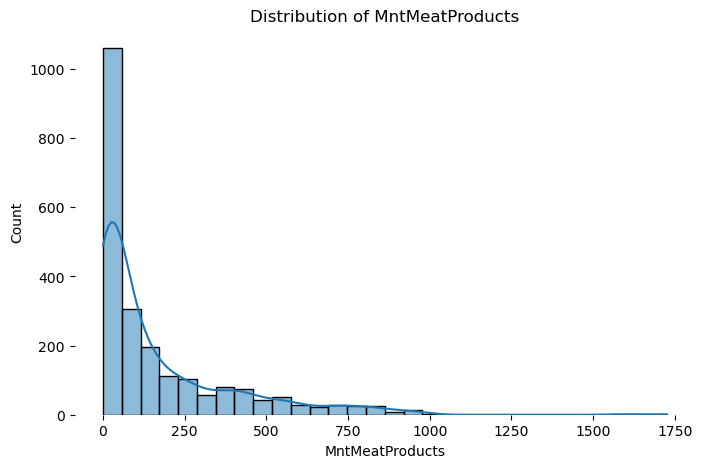

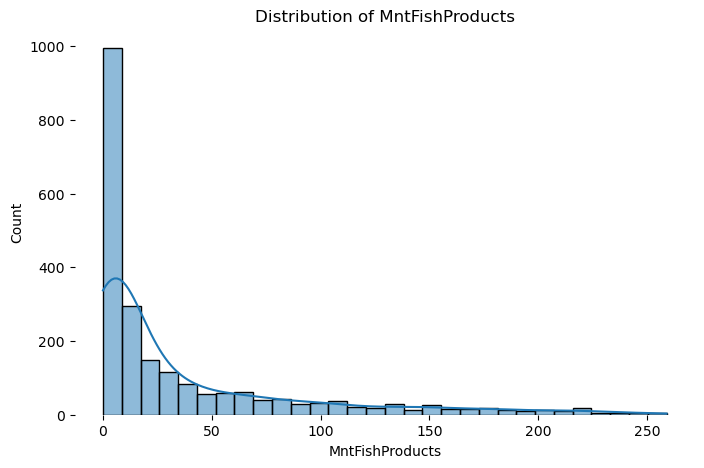

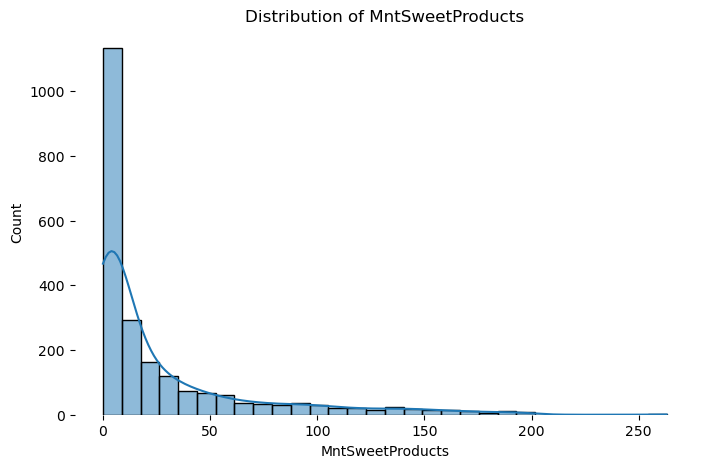

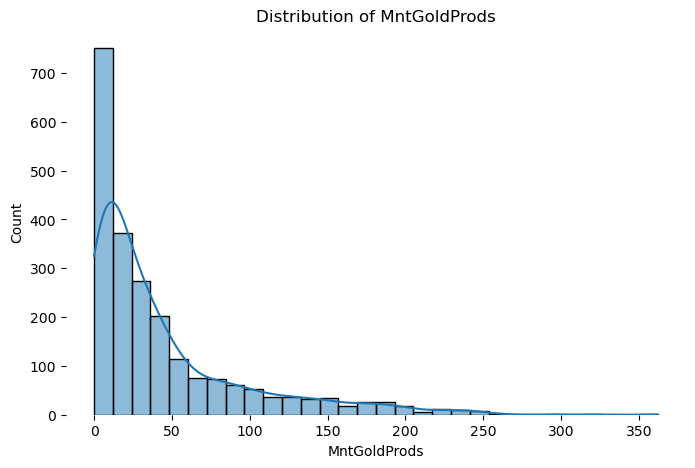

In [8]:
numeric_features = ['Total_Spend', 'Num_Total_Purchases','Age', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], bins=30, kde=True,)
    plt.title(f'Distribution of {feature}')
    sns.despine(left=True, bottom=True)
    
    plt.show()

**Distribution of All Categorical Features**

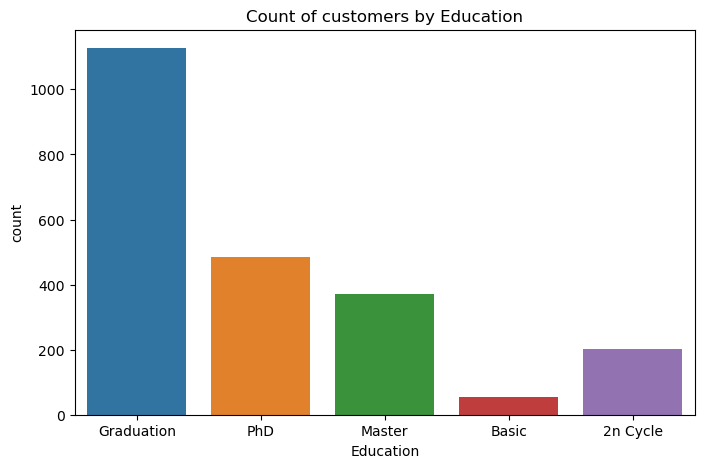

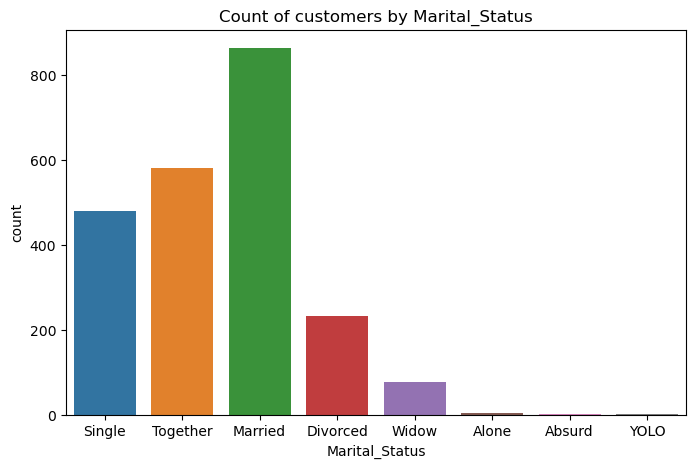

In [9]:
categorical_features = ['Education', 'Marital_Status']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature)
    plt.title(f'Count of customers by {feature}')
    plt.show()

**Bivariate Analysis**

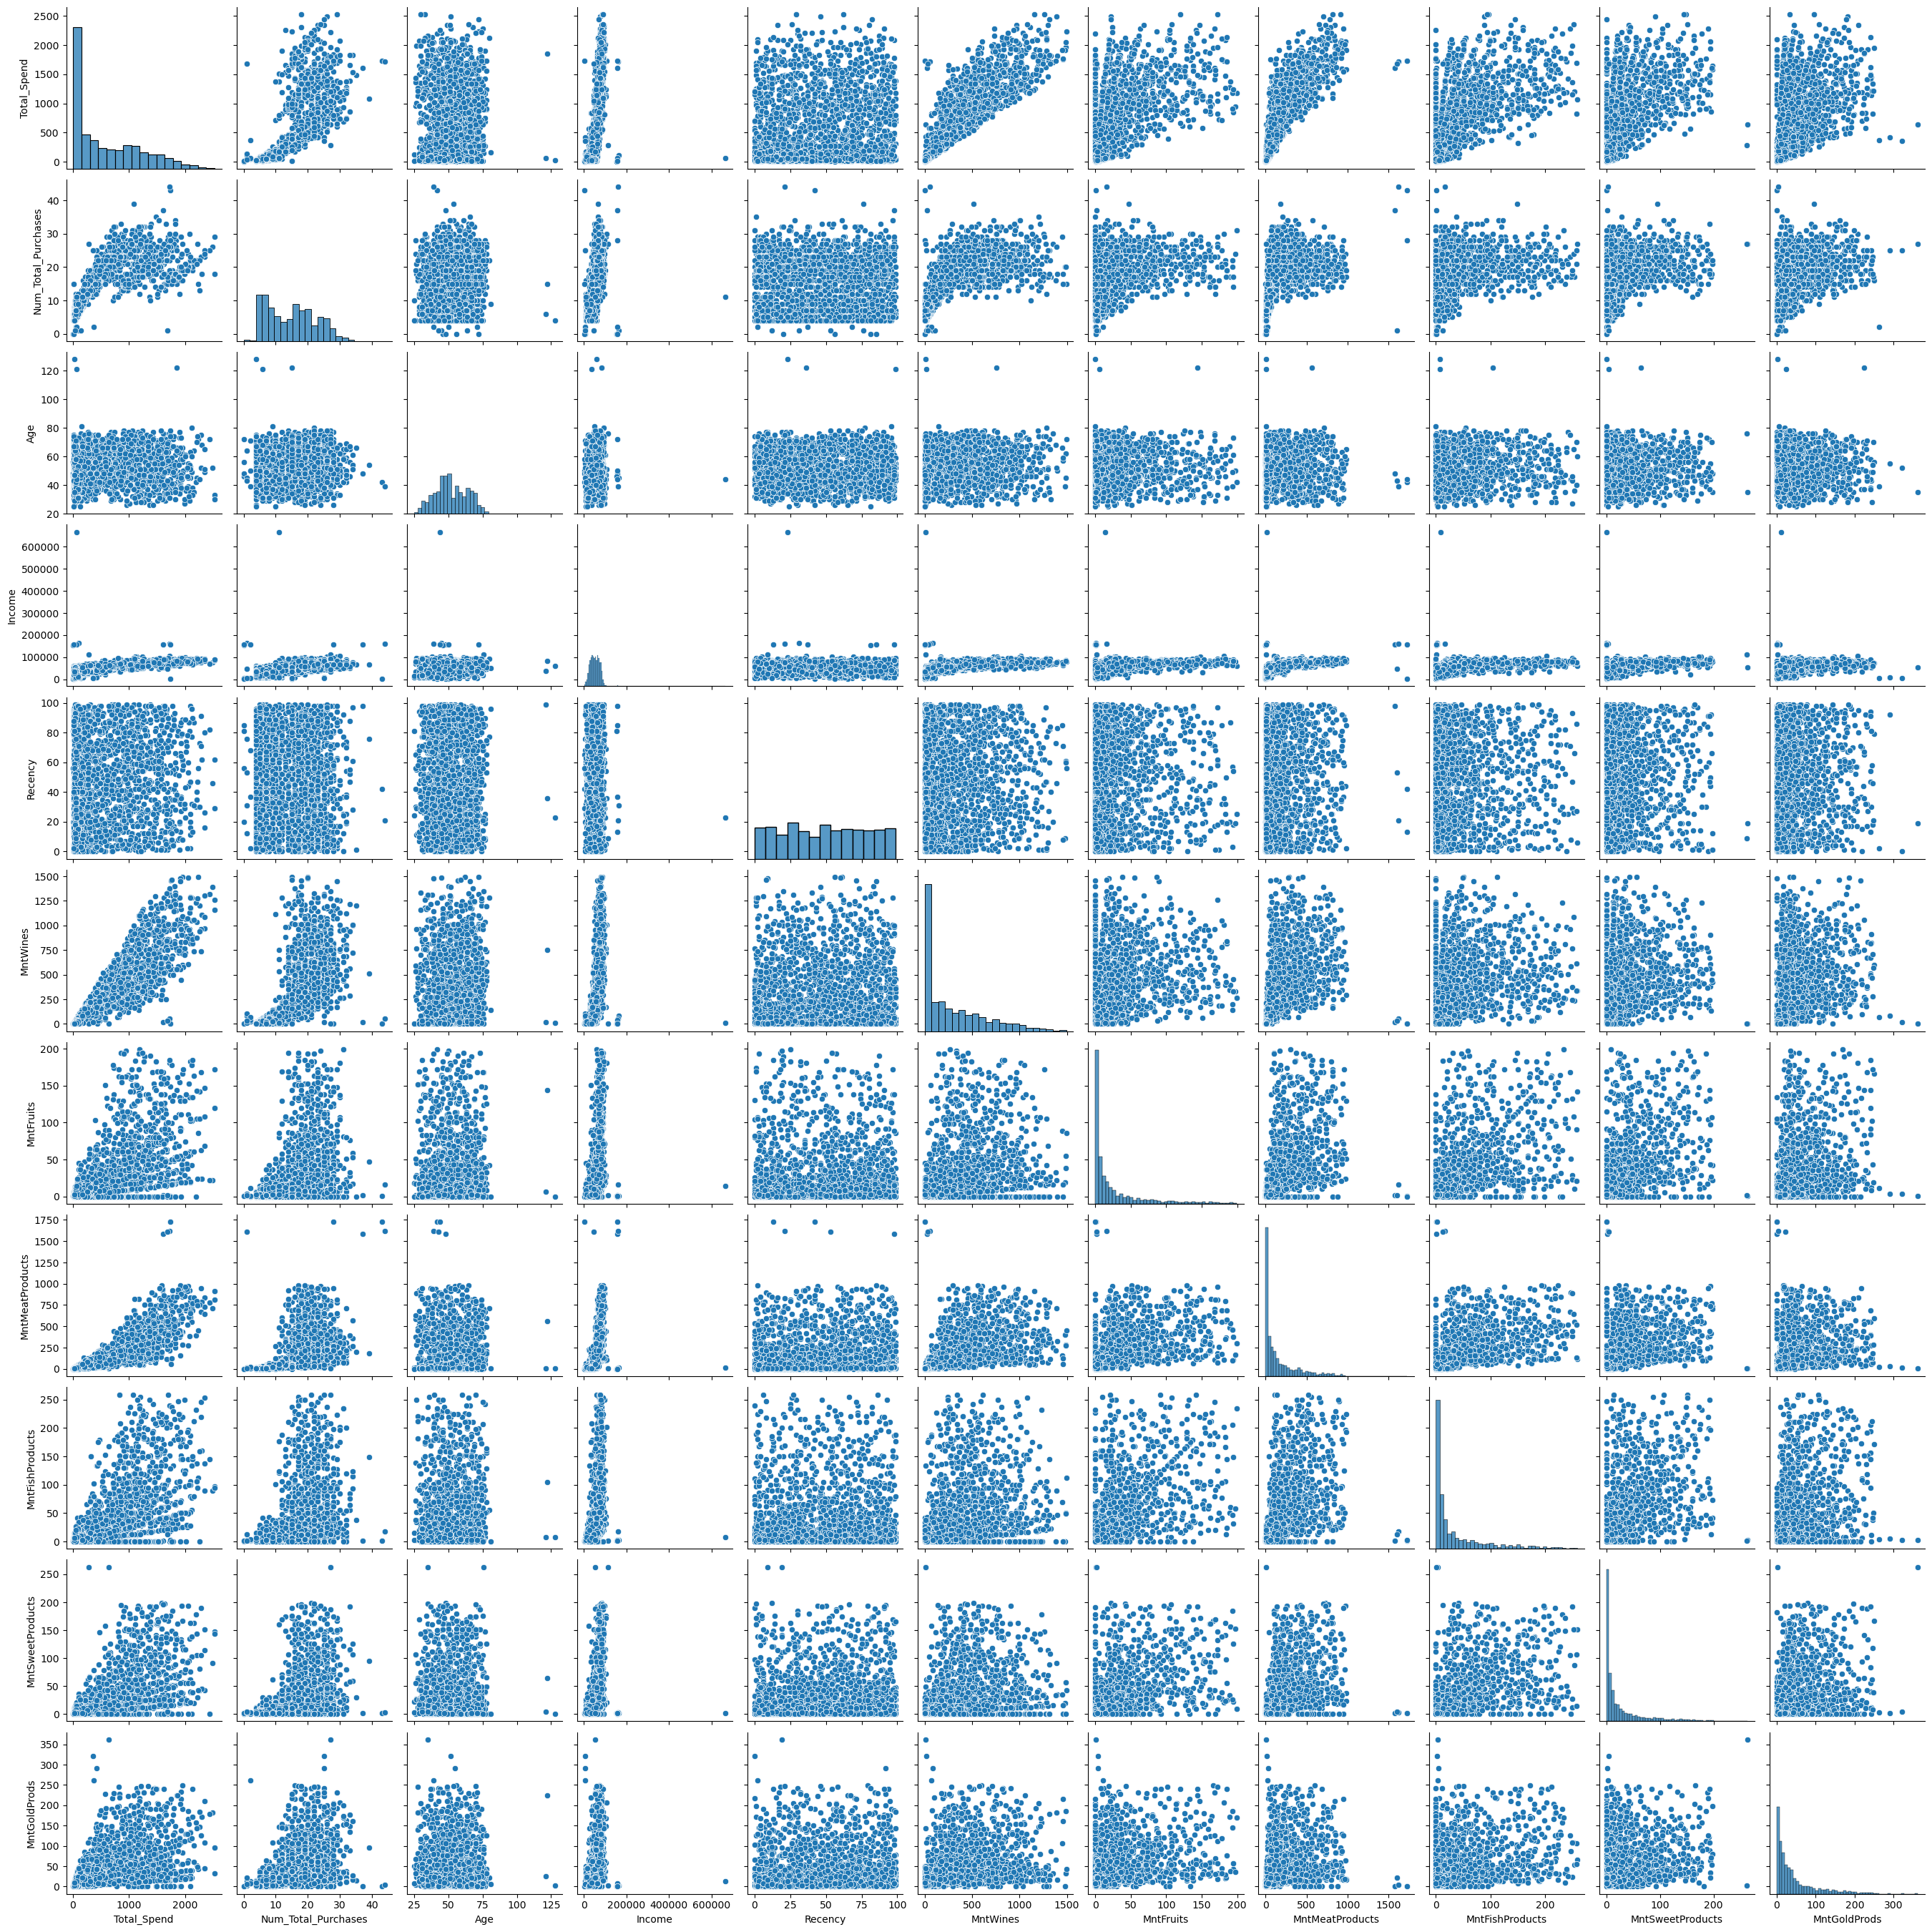

In [10]:
sns.pairplot(df[numeric_features])
plt.show()

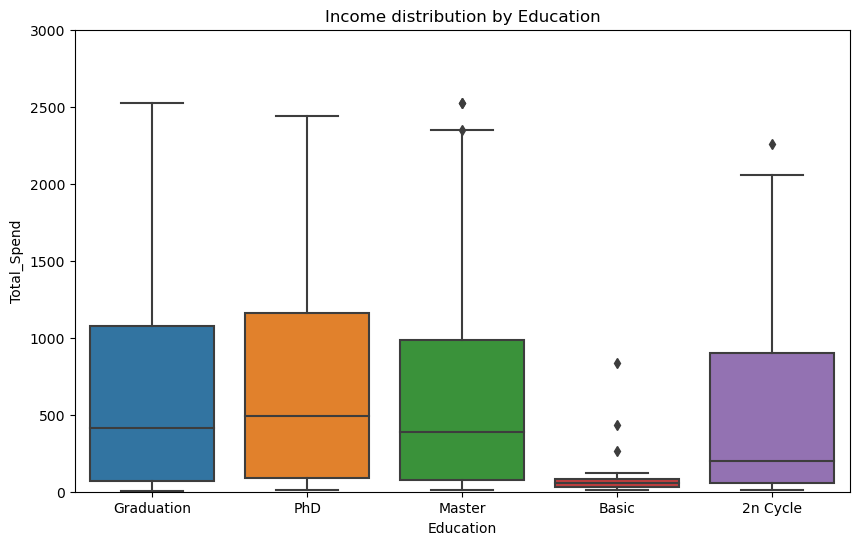

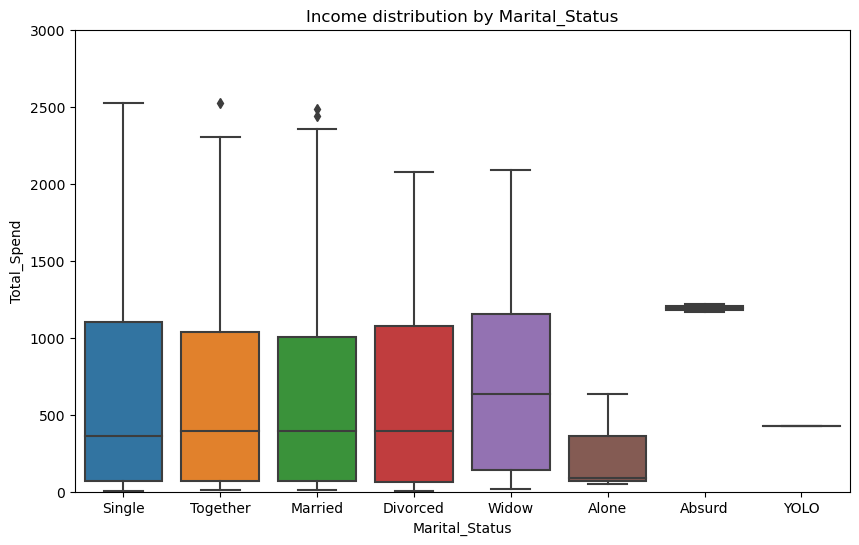

In [11]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='Total_Spend', data=df)
    plt.title(f'Income distribution by {feature}')
    plt.ylim(0, 3000)
    plt.show()


- We can observe that consumers with a Ph.D. education level and those with a marital status of "Widow" exhibit the best performance in terms of total spending.

# RMF Analysis

RMF analysis is a common customer analysis method that evaluates customer value based on their purchasing behavior. RMF stands for "Recency," "Frequency," and "Monetary," three indicators used to quantify different aspects of each customer.

In this dataset, RMF analysis can be employed to identify high-value customer segments. For instance, customers can be categorized into different levels such as "High-Value Customers," "Medium-Value Customers," and "Low-Value Customers" based on their recency of purchase, purchase frequency, and total purchase amount. Different promotional schemes can then be tailored for each customer segment.

In [12]:
df.rename(columns={'Num_Total_Purchases': 'Frequency'}, inplace=True)
rfm = df.loc[:, ['ID', 'Recency', 'Frequency', 'Total_Spend']]
rfm.columns = ["ID",'recency', 'frequency', 'monetary']
rfm.head().style.background_gradient(cmap="GnBu")


In [13]:
def rfm_scores(dataframe):
    dataframe["recency_score"] = pd.cut(dataframe["recency"], bins=5, labels=[1, 2, 3, 4, 5])
    dataframe["frequency_score"] = pd.cut(dataframe["frequency"], bins=5, labels=[1, 2, 3, 4, 5])
    dataframe["monetary_score"] = pd.cut(dataframe["monetary"], bins=5, labels=[1, 2, 3, 4, 5])
    dataframe["rfm_score"] = dataframe["recency_score"].astype(str) + dataframe["frequency_score"].astype(str)
    return dataframe

**Grouping customers based on their RMF scores (5 being the highest and 1 being the lowest).**

In [14]:
rfm_scores(rfm)
rfm.head()

ID  recency  frequency  monetary recency_score frequency_score  \
0  5524       58         25      1617             3               3   
1  2174       38          6        27             2               1   
2  4141       26         21       776             2               3   
3  6182       26          8        53             2               1   
4  5324       94         19       422             5               3   

  monetary_score rfm_score  
0              4        33  
1              1        21  
2              2        23  
3              1        21  
4              1        53

In [15]:
rfm[["recency","frequency","monetary"]].describe().T

count        mean         std  min    25%    50%     75%     max
recency    2240.0   49.109375   28.962453  0.0  24.00   49.0    74.0    99.0
frequency  2240.0   14.862054    7.677173  0.0   8.00   15.0    21.0    44.0
monetary   2240.0  605.798214  602.249288  5.0  68.75  396.0  1045.5  2525.0

# Customer Segmentation Clustering

**- Perform Label Encoding on categorical data and explain its significance.**
Label Encoding is a process in which categorical data, represented by non-numeric labels, is converted into numeric format. Each unique category is assigned a unique integer, transforming the categorical data into a numerical format that machine learning algorithms can effectively utilize.


In [16]:
# Label Encoding
le = LabelEncoder()
x = df
x['Education'] = le.fit_transform(x['Education'])
x['Marital_Status'] = le.fit_transform(x['Marital_Status'])
x = x.drop(['Dt_Customer'], axis=1)

**- Drop outliers**
- Outliers can significantly impact the performance of machine learning models, especially those sensitive to extreme values. By removing outliers, you create a more robust and accurate model.
- Outliers may not follow the same patterns as the majority of data points, potentially leading to overfitting. Removing outliers contributes to better generalization of models to new, unseen data.

In [17]:
len(df)

2240

In [18]:
# Calculate Z-scores
z_scores = stats.zscore(x)
threshold = 3

outlier_indices = np.where(np.abs(z_scores) > threshold)

# Drop outliers from the DataFrame
x = x.drop(outlier_indices[0])
df = df.drop(outlier_indices[0])

## K-Means 

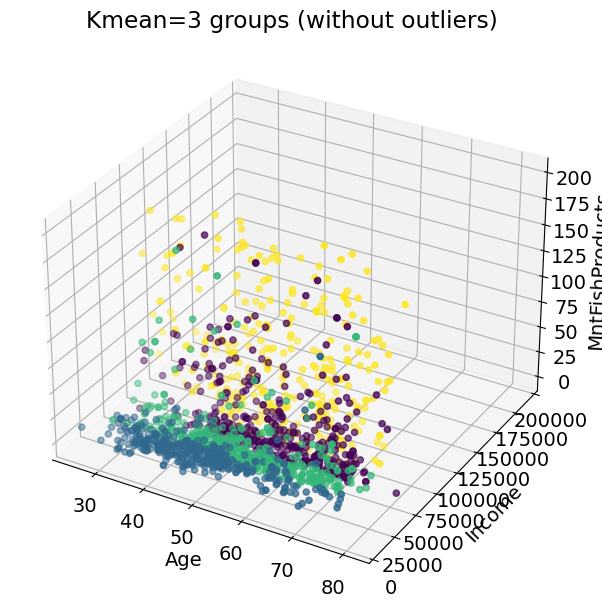

In [19]:
num_cluster = 4
random_state  = 42

# k-means cluster
kmeans = KMeans(n_clusters=num_cluster, random_state=random_state).fit(x)
y = kmeans.predict(x)

x['Cluster'] = y
df['Cluster'] = y

# Set colors for clusters
cluster_colors = ['red', 'green', 'blue', 'purple']

# Plotting
plt.rcParams['font.size'] = 14
fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(122, projection='3d')
plt.title('Kmean=3 groups (without outliers)')
ax.scatter(x.iloc[:, 1], x.iloc[:, 4], x.iloc[:, 9], c=y)
ax.set_xlabel(x.columns.values[1])
ax.set_ylabel(x.columns.values[4])
ax.set_zlabel(x.columns.values[9])
plt.ylim(0, 200000)

plt.show()

**The distribution plot of customer clusters**

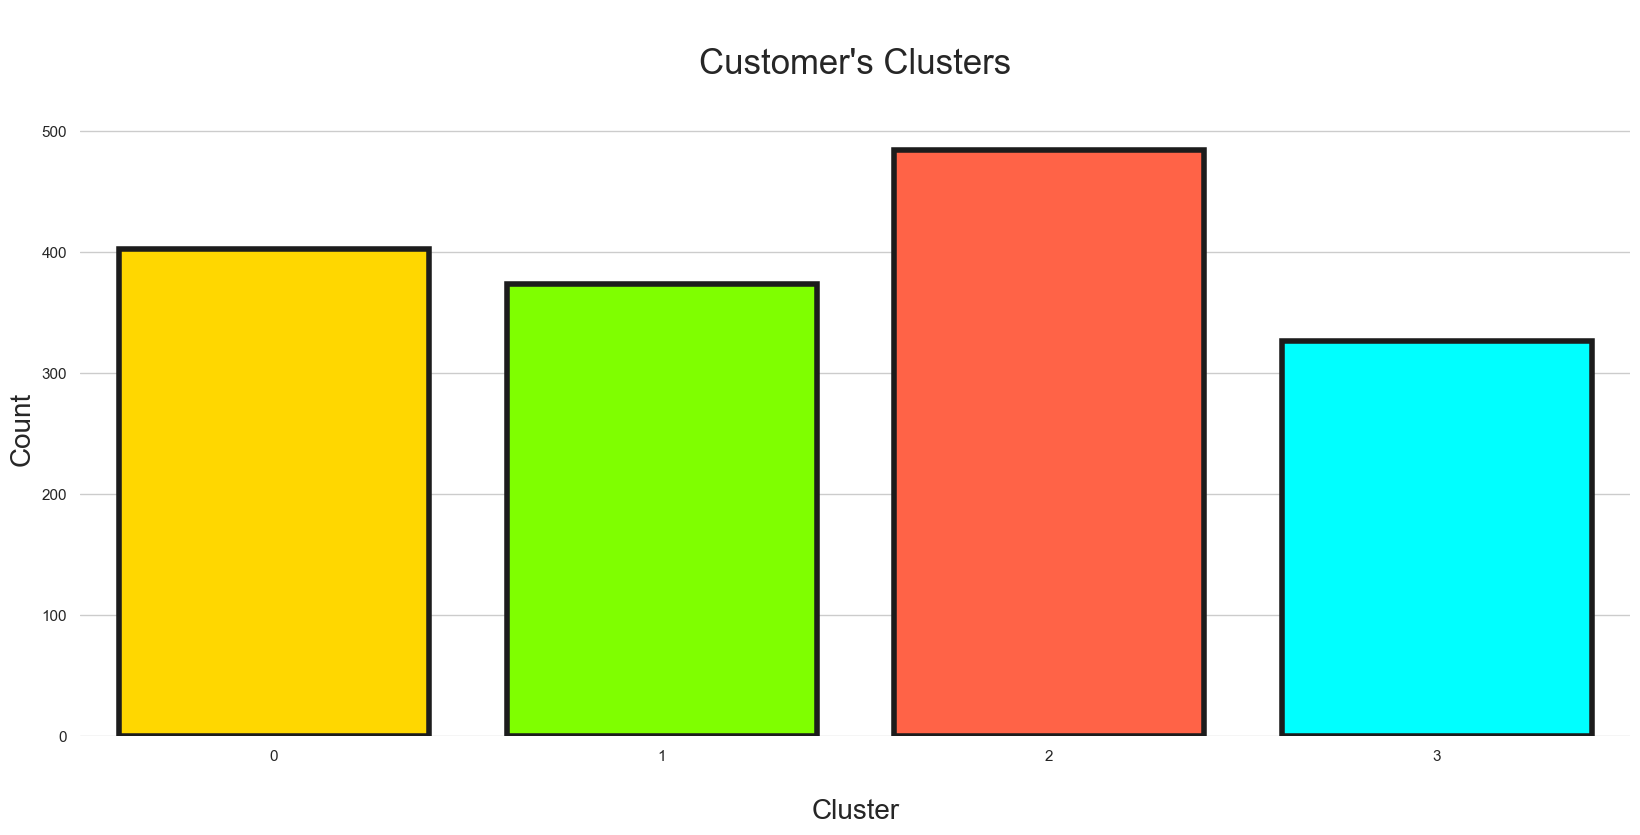

In [20]:
sns.set_theme(style="whitegrid", palette="Blues_d")

# Choose different colors for each cluster
cluster_colors = {"Cluster 5": "#FFD700", "Cluster 6": "#7FFF00", "Cluster 7": "#FF6347", "Cluster 8": "#00FFFF"}

# Plotting
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=x["Cluster"], palette=cluster_colors.values(),saturation=1,edgecolor="#1c1c1c", linewidth=4)

p.set_yscale("linear")
p.set_title("\nCustomer's Clusters\n", fontsize=25)
p.set_ylabel("Count", fontsize=20)
p.set_xlabel("\nCluster", fontsize=20)
p.set_xticklabels(p.get_xticklabels(), rotation=0)

sns.despine(left=True, bottom=True)

plt.show()


**Spending Based Clustering Profile**

We can observe from the following chart the varying consumer spending across different clusters, with significant differences immediately apparent. The chart provides a clear visualization of the distinct levels of expenditure among the different consumer groups.

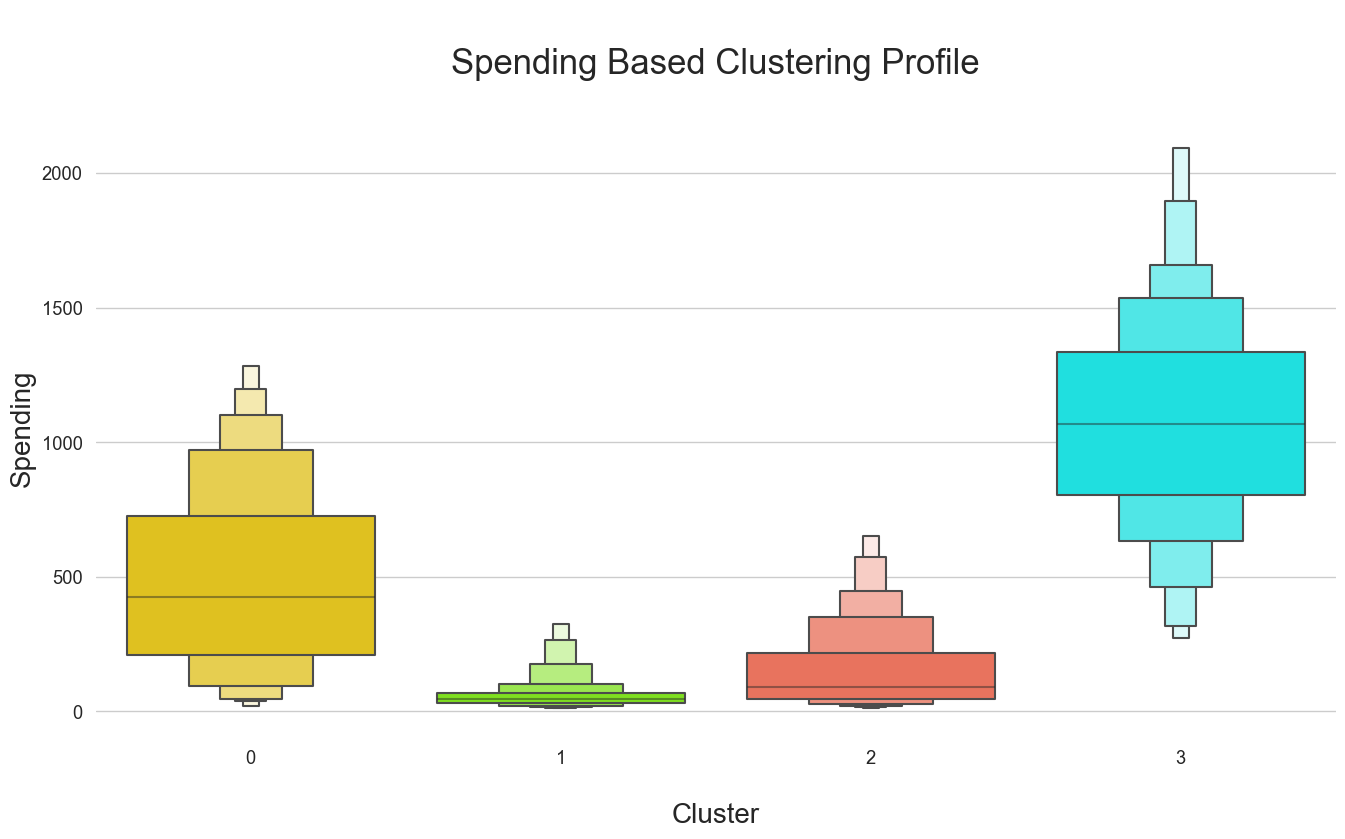

In [21]:
plt.figure(figsize=(16, 8))
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

# Combine boxen plot with swarm plot
sns.boxenplot(x=x["Cluster"], y=x["Total_Spend"], showfliers=False, palette=cluster_colors.values())

plt.title("\nSpending Based Clustering Profile\n", fontsize=25)
plt.ylabel("Spending", fontsize=20)
plt.xlabel("\nCluster", fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()


**Frequency Based Clustering Profile**

Similarly, the total number of purchases made by consumers within each cluster reflects their performance in terms of overall sales figures

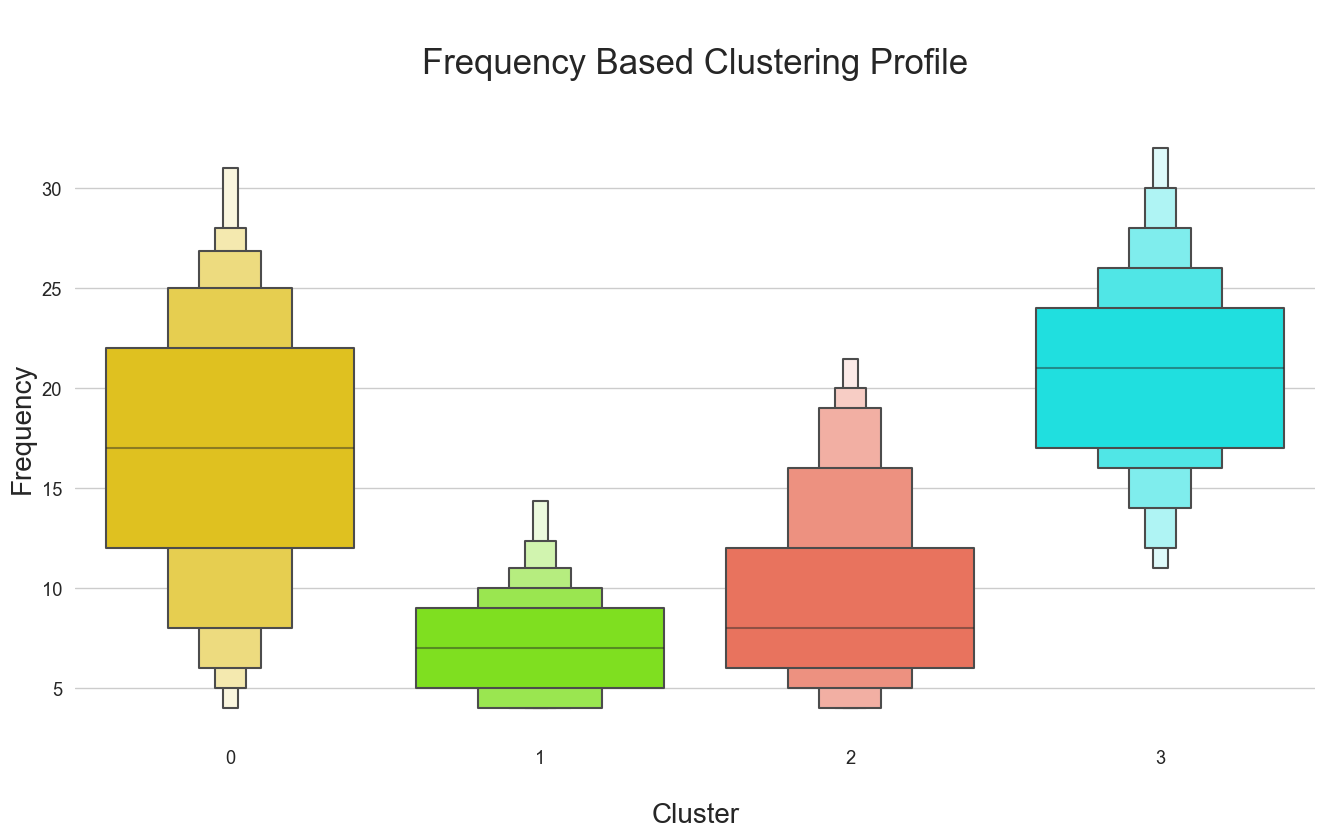

In [22]:
plt.figure(figsize=(16, 8))
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

# Combine boxen plot with swarm plot
sns.boxenplot(x=x["Cluster"], y=x["Frequency"], showfliers=False, palette=cluster_colors.values())

plt.title("\nFrequency Based Clustering Profile\n", fontsize=25)
plt.ylabel("Frequency", fontsize=20)
plt.xlabel("\nCluster", fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Age Based Clustering Profile**

When using age as a criterion for differentiation, we observe that the average age of consumers in clusters 0, 2, and 3 falls between 50 and 60 years, while the average age of consumers in cluster 1 is around 45 years.

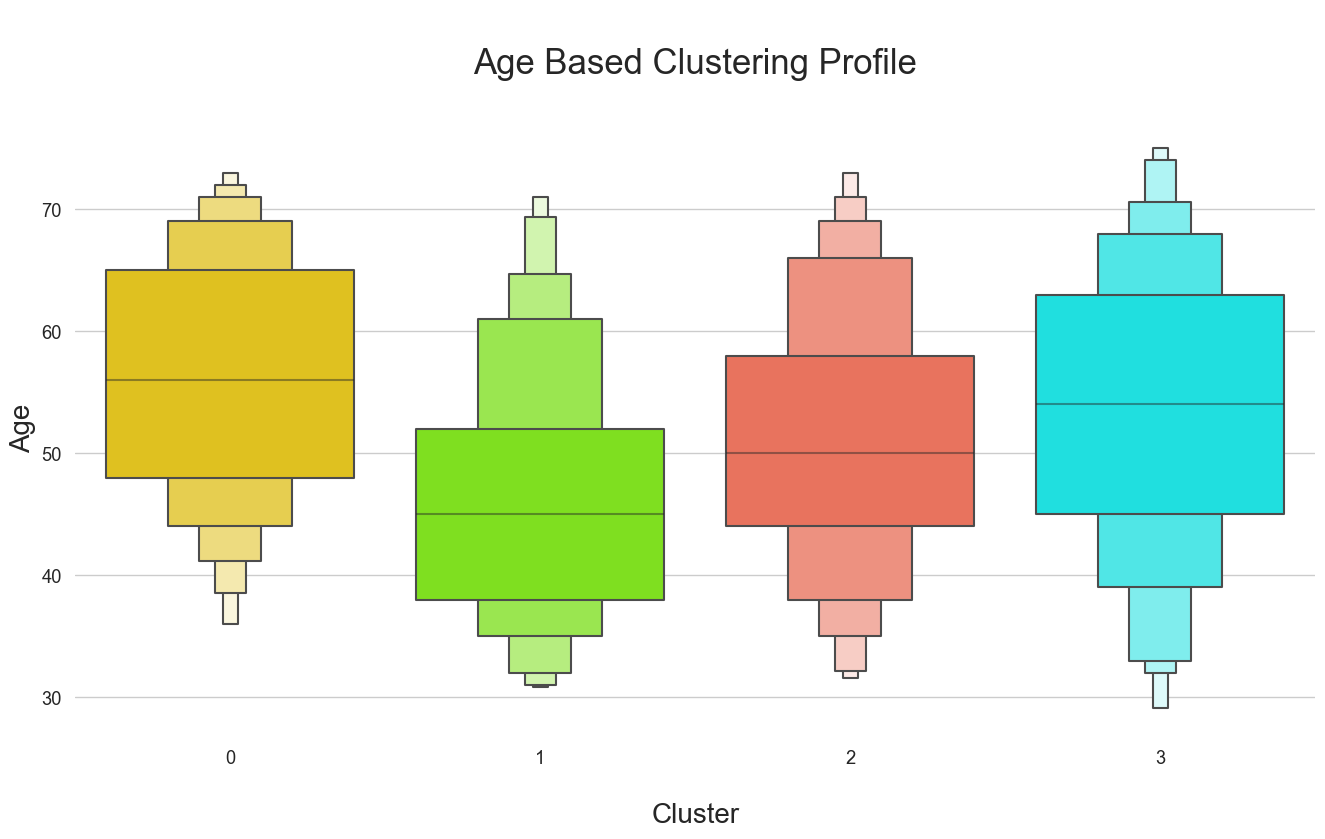

In [23]:
plt.figure(figsize=(16, 8))
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

# Combine boxen plot with swarm plot
sns.boxenplot(x=x["Cluster"], y=x["Age"], showfliers=False, palette=cluster_colors.values())

plt.title("\nAge Based Clustering Profile\n", fontsize=25)
plt.ylabel("Age", fontsize=20)
plt.xlabel("\nCluster", fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Income Based Clustering Profile**

It is also intuitively evident that the average income in cluster 1 is notably the lowest. Furthermore, we can observe that this cluster has made a precise delineation based on the average income of consumers

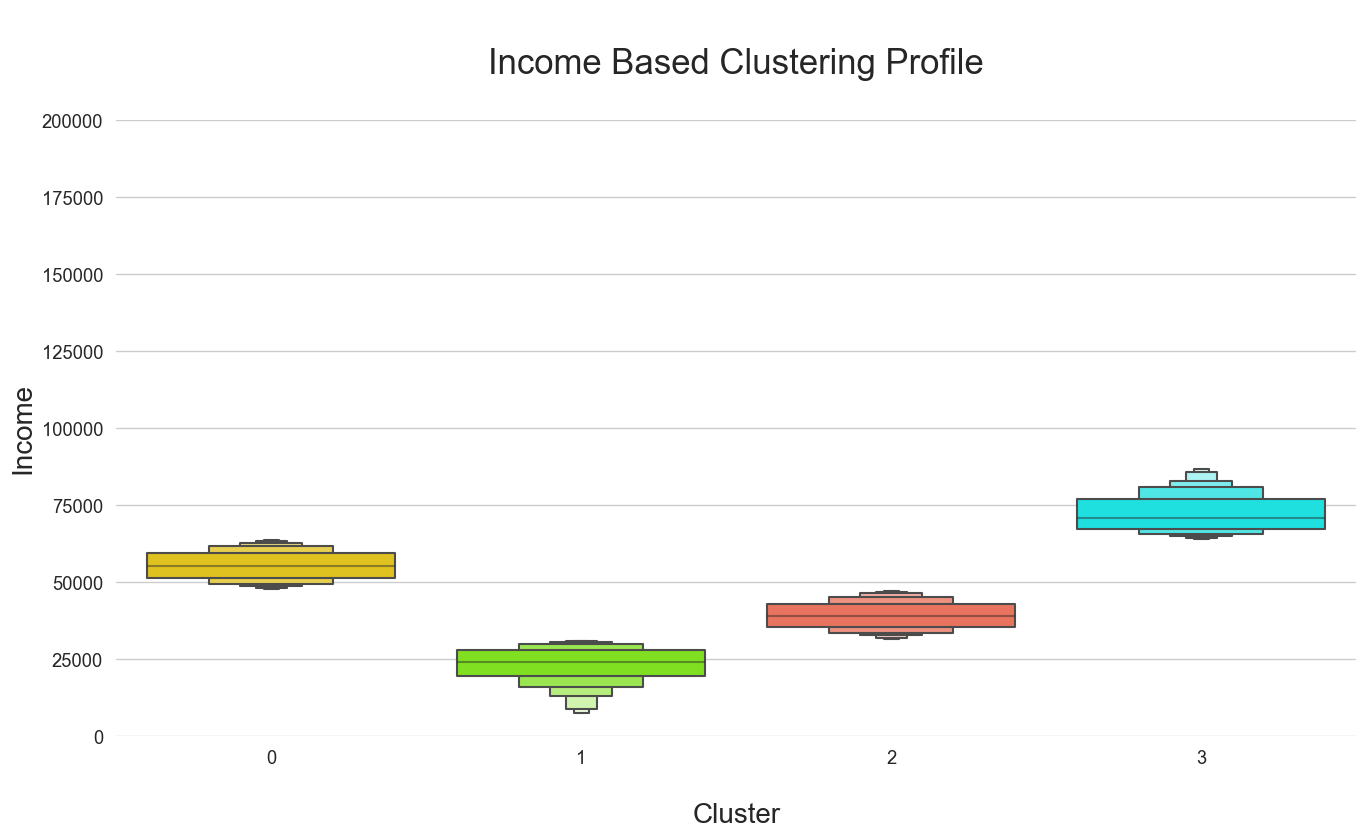

In [24]:
plt.figure(figsize=(16, 8))
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

# Combine boxen plot with swarm plot
sns.boxenplot(x=x["Cluster"], y=x["Income"], showfliers=False, palette=cluster_colors.values())

plt.title("\nIncome Based Clustering Profile\n", fontsize=25)
plt.ylabel("Income", fontsize=20)
plt.xlabel("\nCluster", fontsize=20)
plt.ylim(0, 200000)

sns.despine(left=True, bottom=True)
plt.show()

**Product catogory Clustering Profile(Wines)**

From the chart below, it is evident that consumers in cluster 0 have significantly higher alcohol purchases compared to the other three clusters.

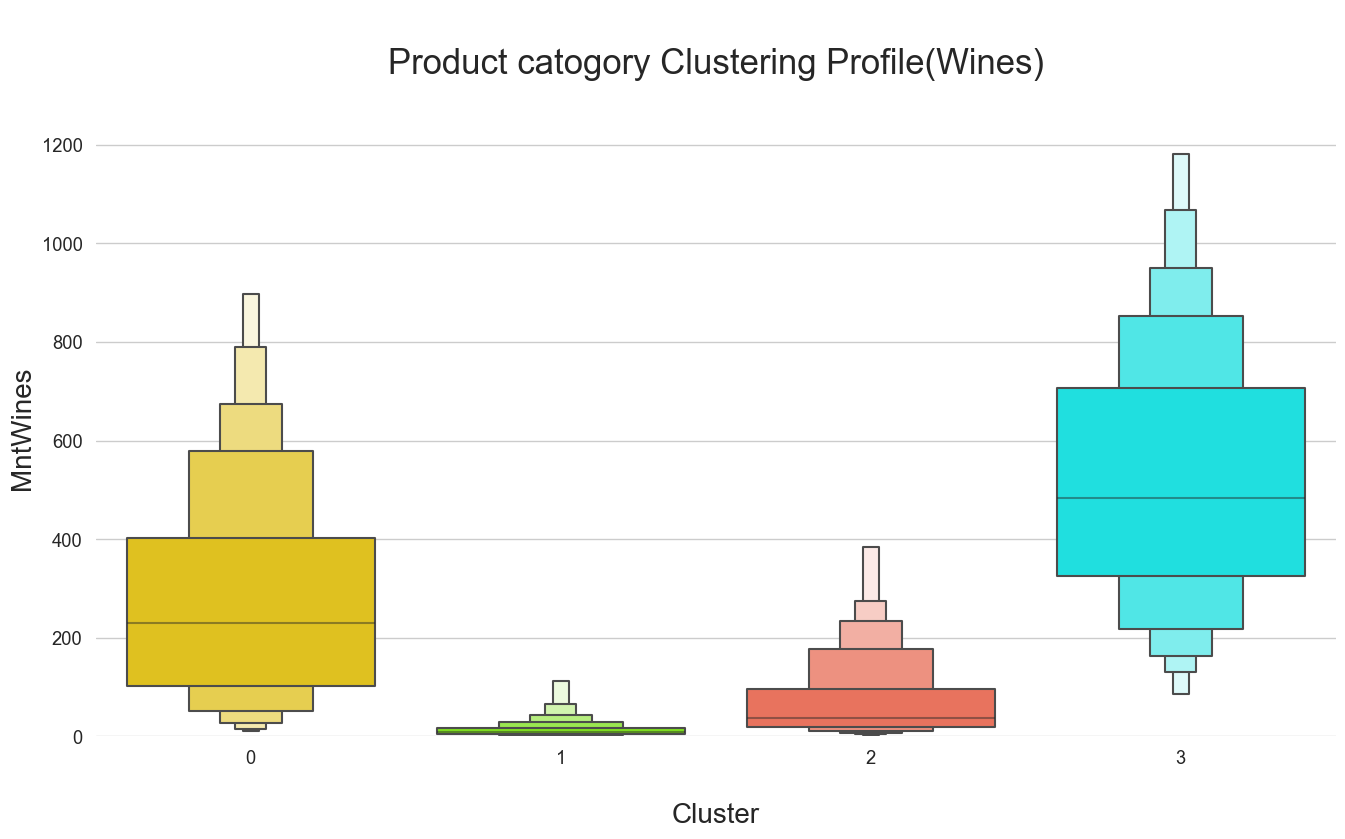

In [25]:
plt.figure(figsize=(16, 8))
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

# Combine boxen plot with swarm plot
sns.boxenplot(x=x["Cluster"], y=x["MntWines"], showfliers=False, palette=cluster_colors.values())

plt.title("\nProduct catogory Clustering Profile(Wines)\n", fontsize=25)
plt.ylabel("MntWines", fontsize=20)
plt.xlabel("\nCluster", fontsize=20)
plt.ylim(0, 1250)

sns.despine(left=True, bottom=True)
plt.show()

**Product catogory Based Clustering Profile(Gold)**

We can deduce from the chart below that consumers in clusters 0 and 3 are more likely to purchase commodities such as gold.

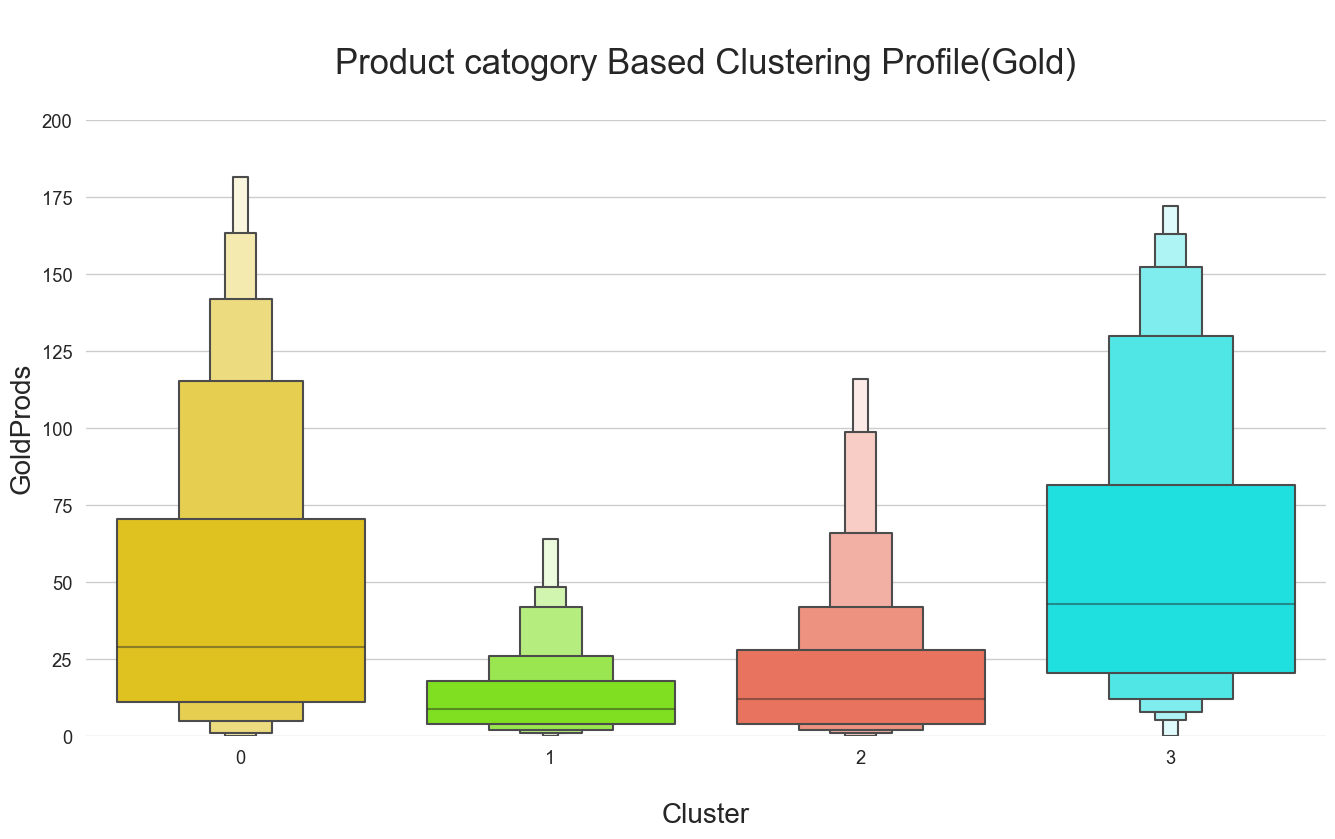

In [26]:
plt.figure(figsize=(16, 8))
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

# Combine boxen plot with swarm plot
sns.boxenplot(x=x["Cluster"], y=x["MntGoldProds"], showfliers=False, palette=cluster_colors.values())

plt.title("\nProduct catogory Based Clustering Profile(Gold)\n", fontsize=25)
plt.ylabel("GoldProds", fontsize=20)
plt.xlabel("\nCluster", fontsize=20)
plt.ylim(0, 200)

sns.despine(left=True, bottom=True)
plt.show()

**NUM of Web Visit VS NUM of Web Purchase**

We can observe from the two chart below that, although consumers in cluster 0 have the fewest website visits, they exhibit the highest frequency of online purchases. Despite having minimal online browsing activity, this cluster demonstrates the highest frequency of online transactions.  
One possible explanation is that consumers who spend more time browsing online may engage in window shopping or informational searches without necessarily intending to make immediate purchases. On the other hand, those who spend less time browsing might have clearer preferences or specific purchase intentions, leading to more direct and purposeful buying behavior.  


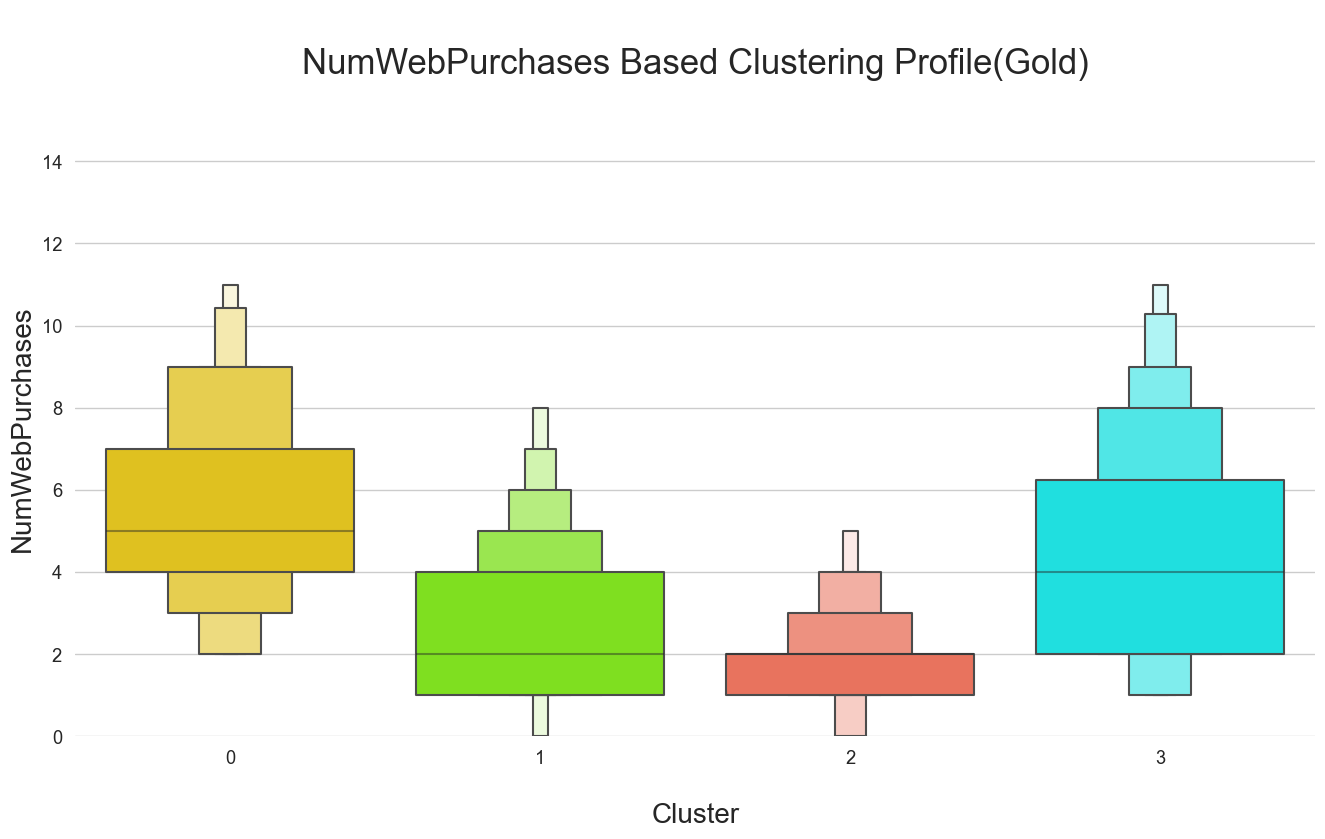

In [55]:
plt.figure(figsize=(16, 8))
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

# Combine boxen plot with swarm plot
sns.boxenplot(x=x["Cluster"], y=x["NumWebPurchases"], showfliers=False, palette=cluster_colors.values())

plt.title("\nNumWebPurchases Based Clustering Profile(Gold)\n", fontsize=25)
plt.ylabel("NumWebPurchases", fontsize=20)
plt.xlabel("\nCluster", fontsize=20)
plt.ylim(0, 15)

sns.despine(left=True, bottom=True)
plt.show()

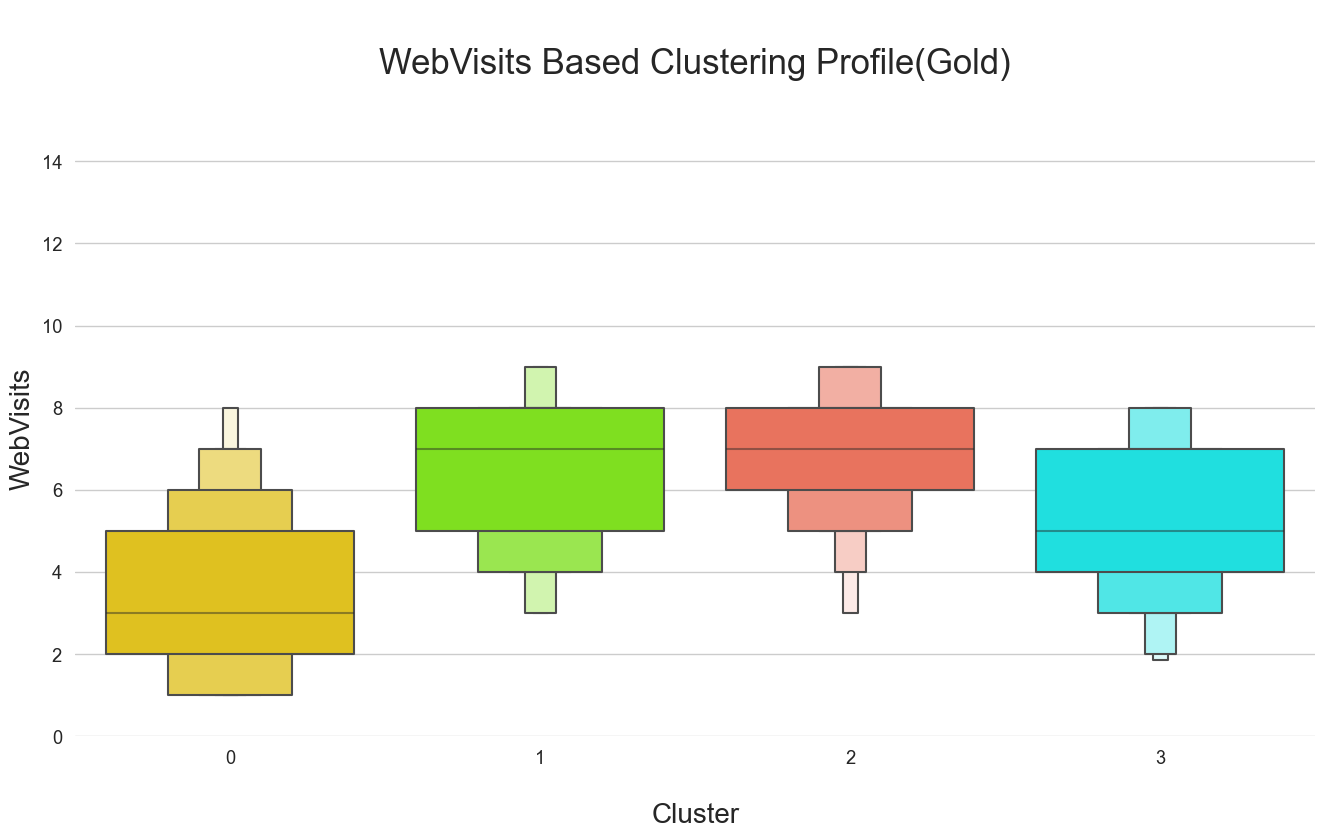

In [56]:
plt.figure(figsize=(16, 8))
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

# Combine boxen plot with swarm plot
sns.boxenplot(x=x["Cluster"], y=x["NumWebVisitsMonth"], showfliers=False, palette=cluster_colors.values())

plt.title("\nWebVisits Based Clustering Profile(Gold)\n", fontsize=25)
plt.ylabel("WebVisits", fontsize=20)
plt.xlabel("\nCluster", fontsize=20)
plt.ylim(0, 15)

sns.despine(left=True, bottom=True)
plt.show()

## Analysis by cluster 

## BIRCH

In [28]:
# setting parametor
T = 2
n = 4
random_state  = 42
np.random.seed(random_state)

# Construct Birch
model = Birch(threshold=T, n_clusters=n)
model.fit(x)
y = model.predict(x)
x['Cluster'] = y

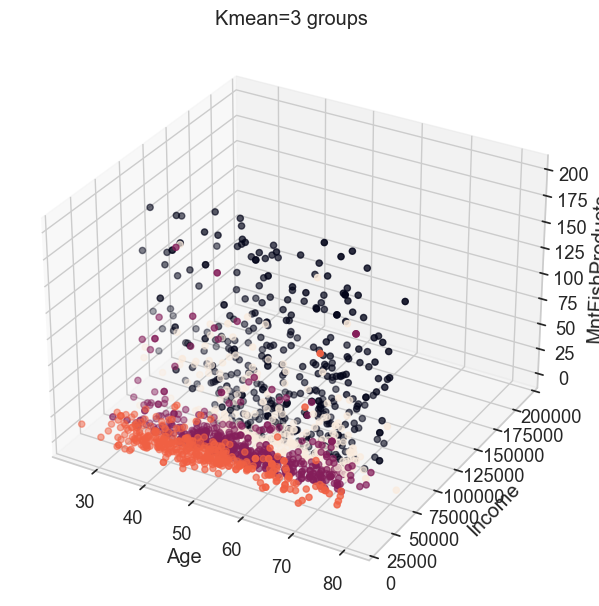

In [29]:
# Plotting
plt.rcParams['font.size'] = 14
fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(122, projection='3d')
plt.title('Kmean=3 groups')
ax.scatter(x.iloc[:, 1], x.iloc[:, 4], x.iloc[:, 9], c=y)
ax.set_xlabel(x.columns.values[1])
ax.set_ylabel(x.columns.values[4])
ax.set_zlabel(x.columns.values[9])
plt.ylim(0, 200000)

plt.show()


**The distribution plot of customer clusters**

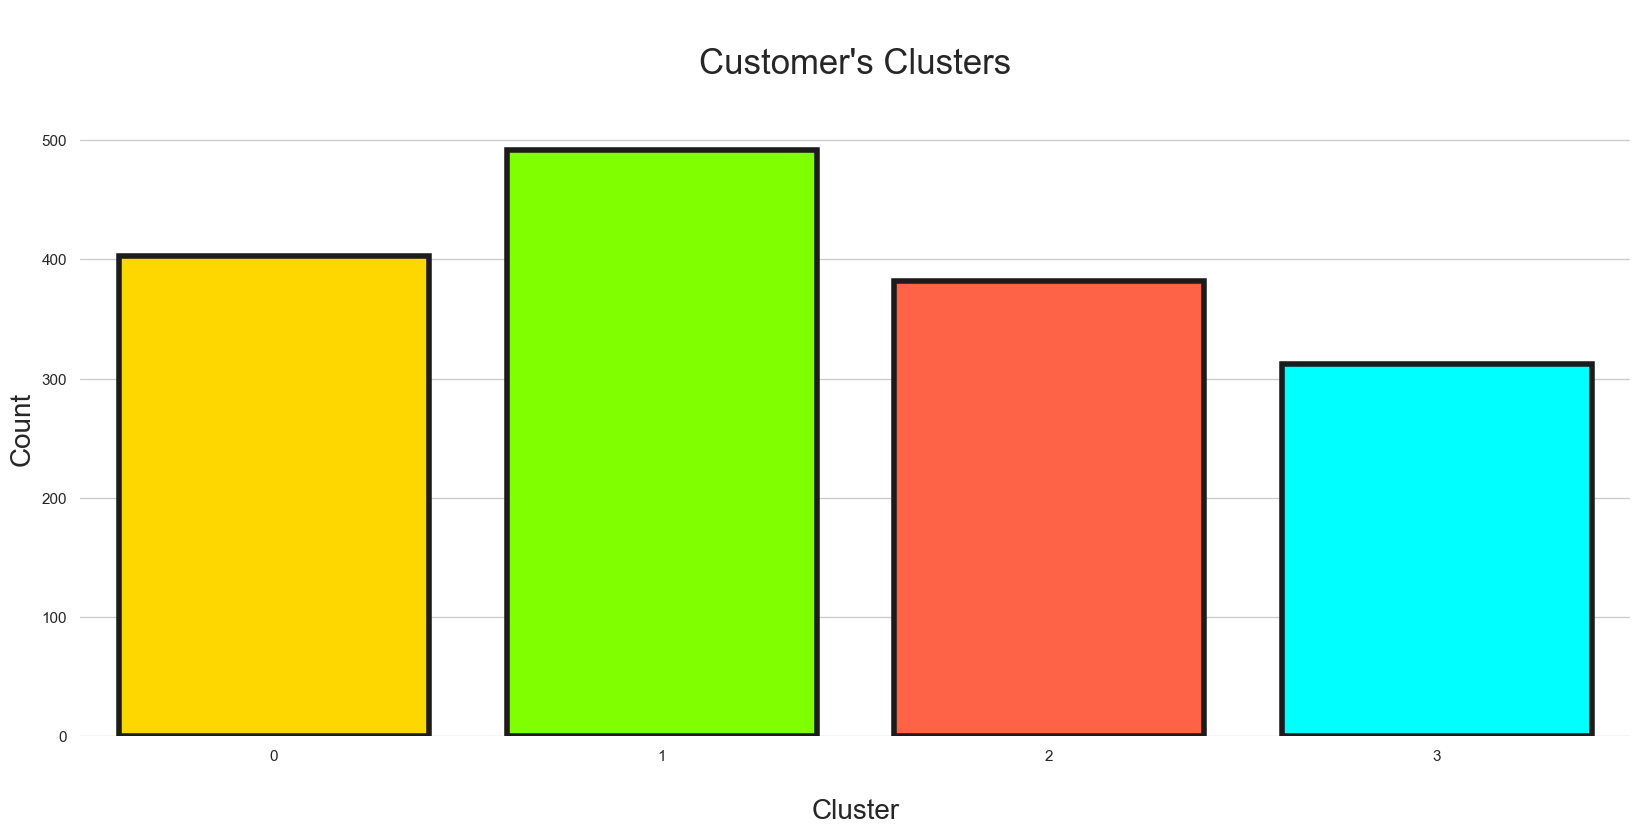

In [30]:
# Set Seaborn theme to "whitegrid" with blue accents
sns.set_theme(style="whitegrid", palette="Blues_d")

# Choose different colors for each cluster
cluster_colors = {"Cluster 5": "#FFD700", "Cluster 6": "#7FFF00", "Cluster 7": "#FF6347", "Cluster 8": "#00FFFF"}

# Plotting
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=x["Cluster"], palette=cluster_colors.values(),saturation=1,edgecolor="#1c1c1c", linewidth=4)

# Customize plot elements
p.set_yscale("linear")
p.set_title("\nCustomer's Clusters\n", fontsize=25)
p.set_ylabel("Count", fontsize=20)
p.set_xlabel("\nCluster", fontsize=20)
p.set_xticklabels(p.get_xticklabels(), rotation=0)

# Remove spines
sns.despine(left=True, bottom=True)

plt.show()


**Clustering Profile**

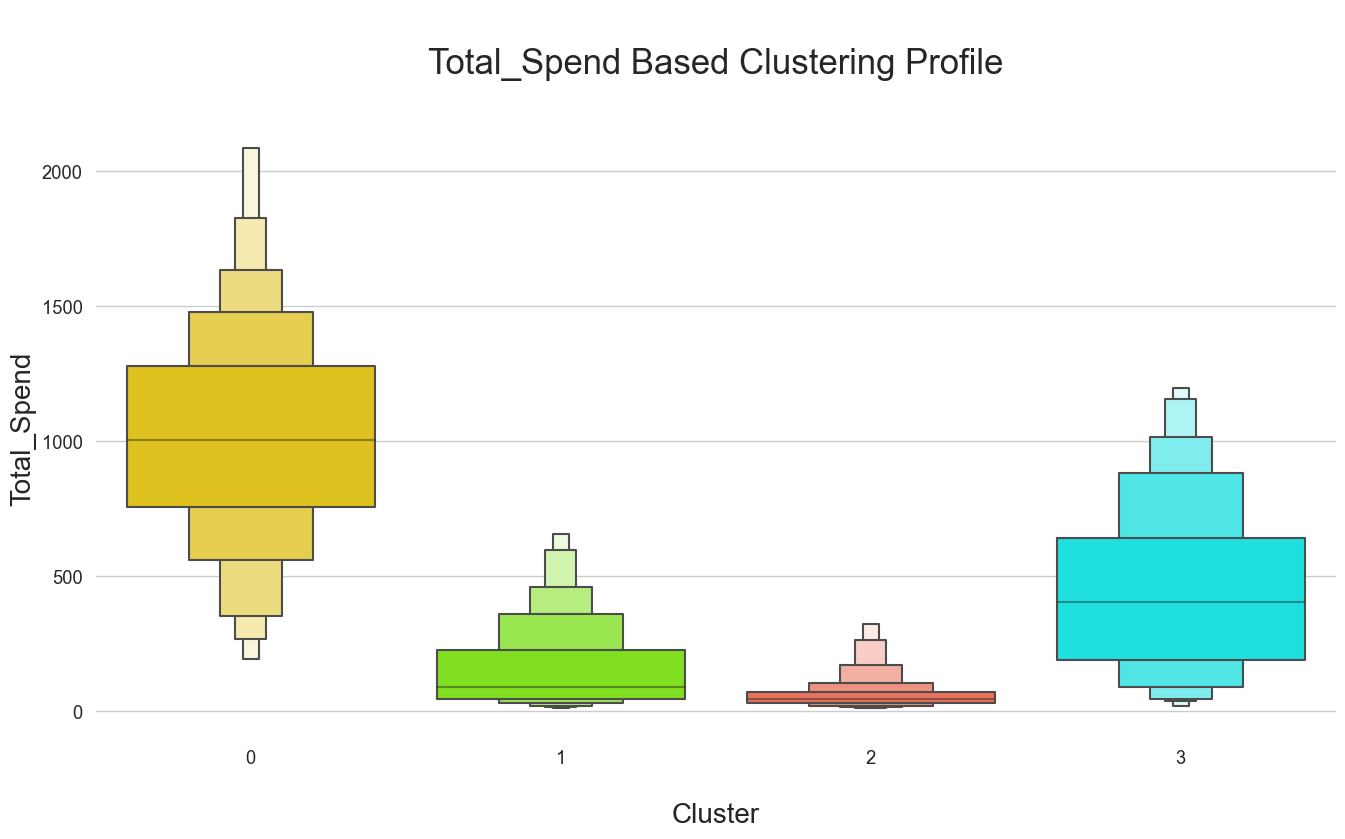

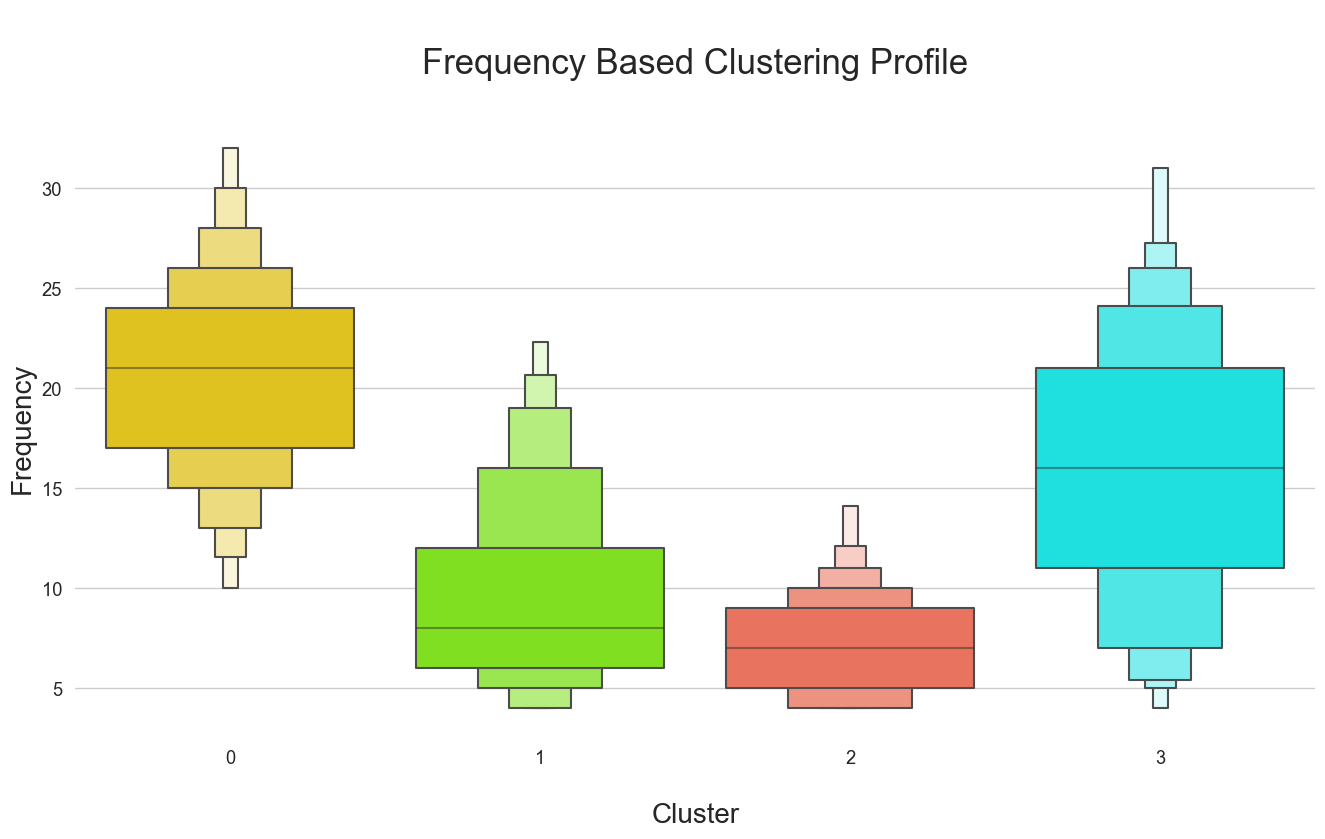

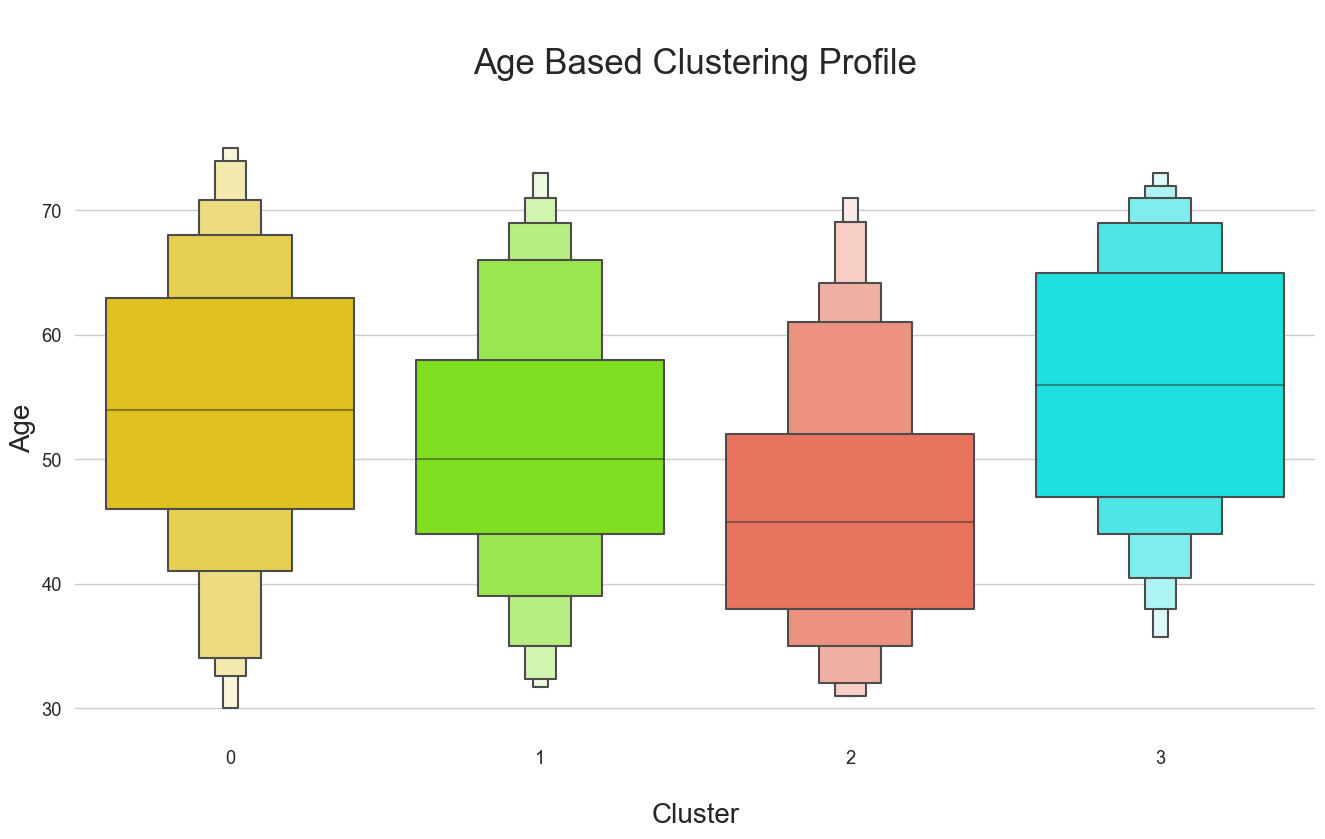

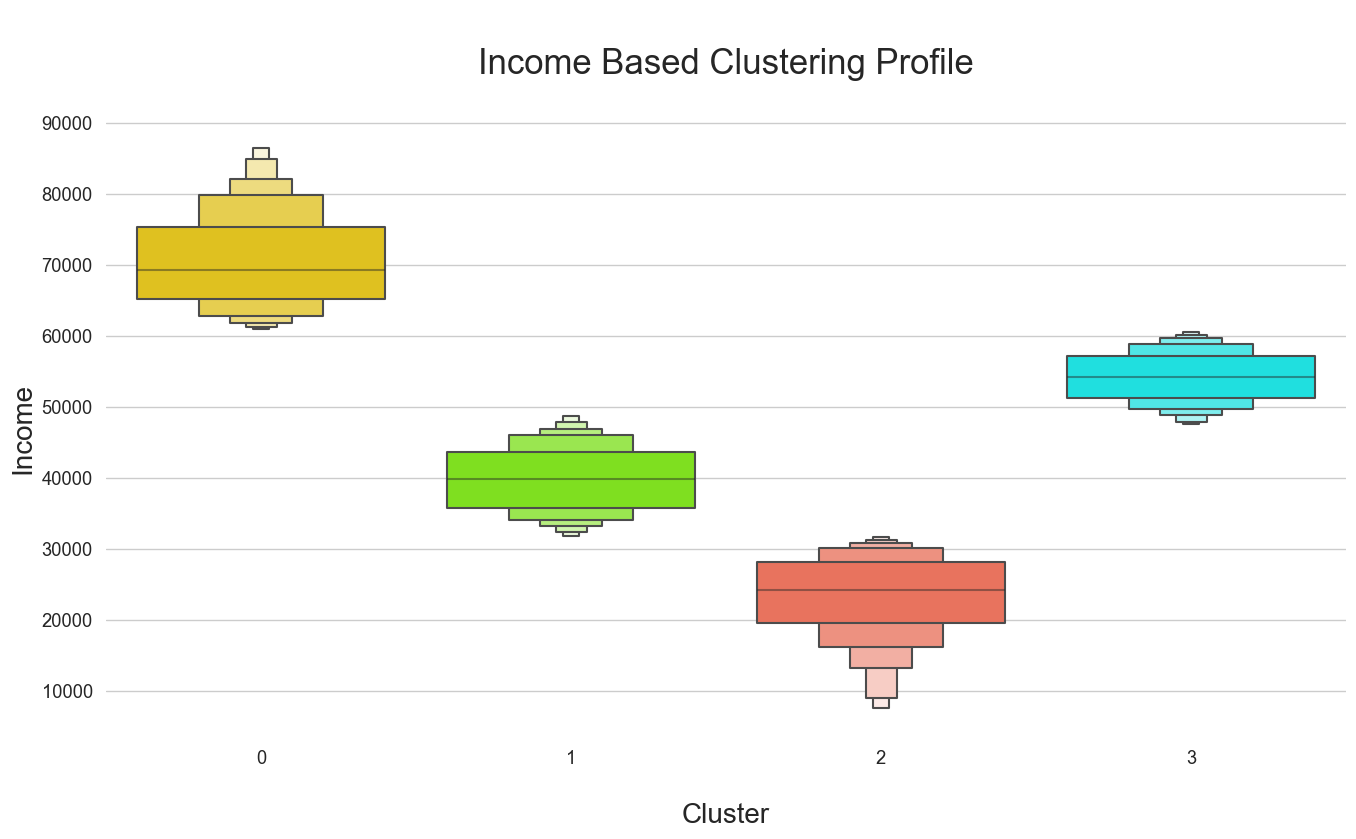

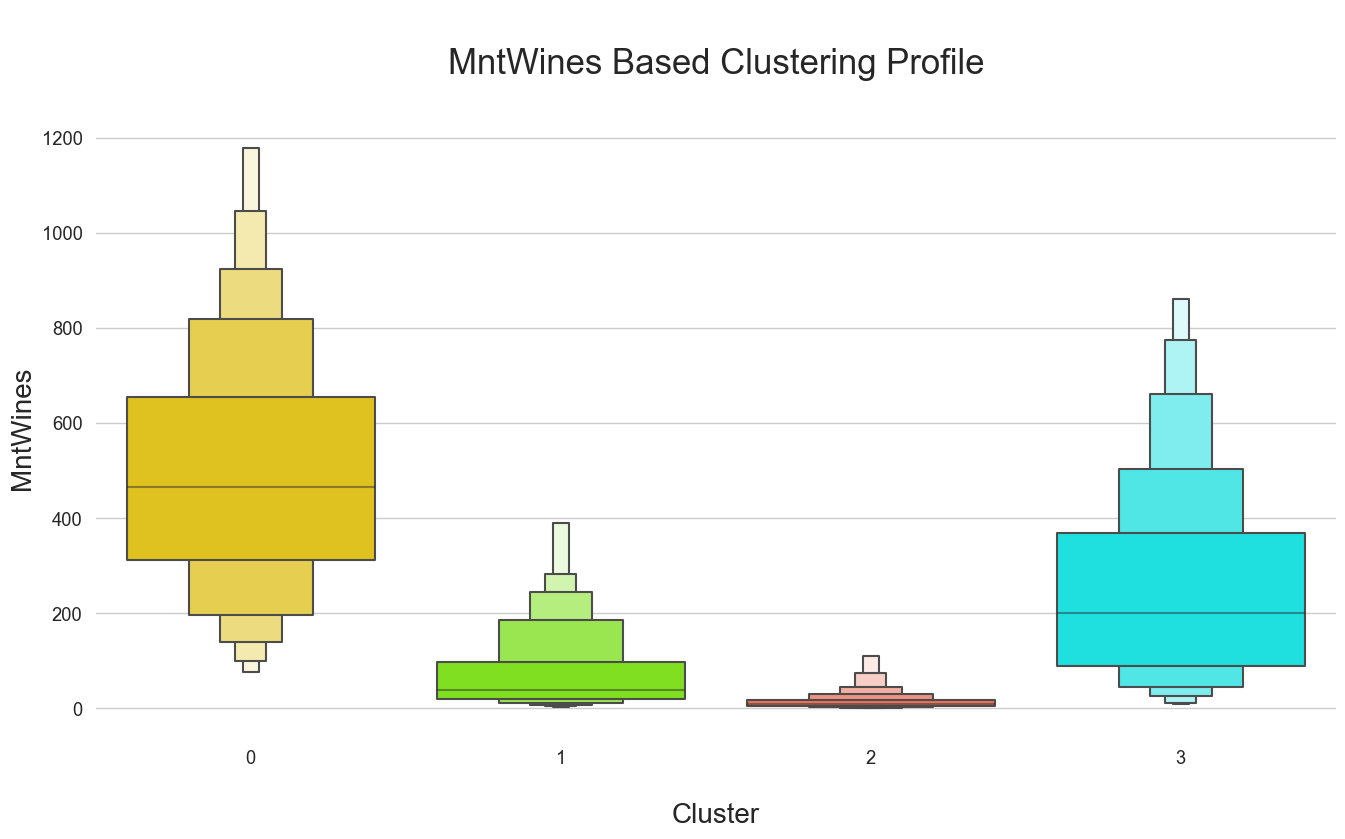

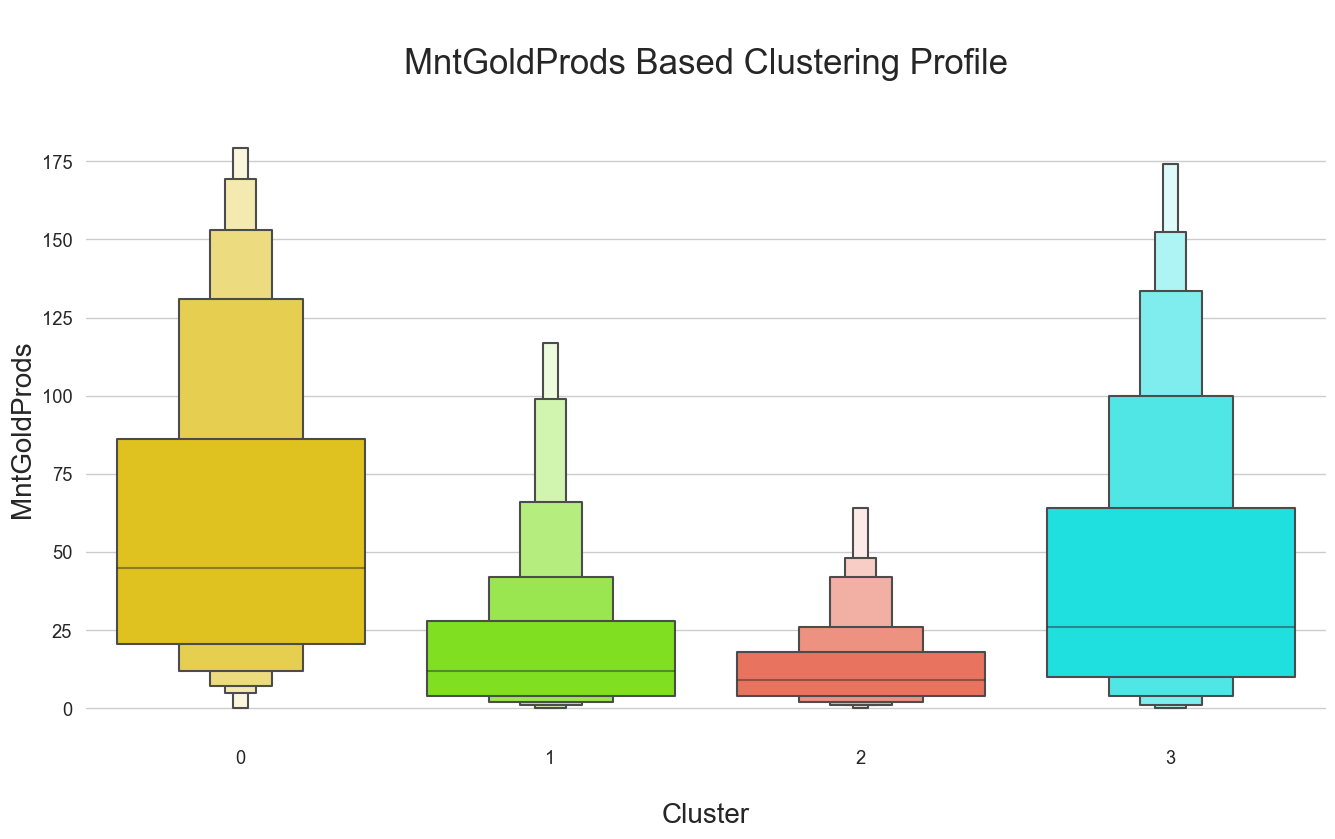

In [46]:
target_feature = ['Total_Spend', 'Frequency', 'Age', 'Income', "MntWines", 'MntGoldProds']
for feature in target_feature:

    plt.figure(figsize=(16, 8))
    sns.set_context("notebook", font_scale=1.2)
    sns.set_style("whitegrid")

    # Combine boxen plot with swarm plot
    sns.boxenplot(x=x["Cluster"], y=x[feature], showfliers=False, palette=cluster_colors.values())

    plt.title(f"\n{feature} Based Clustering Profile\n", fontsize=25)
    plt.ylabel(f"{feature}", fontsize=20)
    plt.xlabel("\nCluster", fontsize=20)

    sns.despine(left=True, bottom=True)
    plt.show()
